In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from catboost import CatBoostRegressor, Pool
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import optuna

In [2]:
test_df = pd.read_csv('/Users/krylov/ds_bootcamp/06-04 kg/test.csv')
train_df = pd.read_csv('/Users/krylov/ds_bootcamp/06-04 kg/train.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [3]:
train_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
pd.reset_option('display.max_columns', None)
pd.reset_option('display.max_rows', None)

In [6]:
missing = df.isna().sum().reset_index()
missing

,index,0
0,Id,0
1,MSSubClass,0
2,MSZoning,4
3,LotFrontage,486
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,1
79,SaleCondition,0


In [7]:
moda_col = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']
none_col = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
            'GarageFinish','GarageQual', 'GarageCond', 'PoolQC',
            'Fence', 'MiscFeature', 'MasVnrType']
zero_col = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'MasVnrArea']


In [8]:
df[none_col] = df[none_col].fillna('No')

df[moda_col] = df[moda_col].apply(lambda x: x.fillna(x.mode()[0]))

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

df[zero_col] = df[zero_col].fillna(0)

In [9]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [10]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
df['Total_Area'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']

current_year = 2025  
df['Age_of_House'] = current_year - df['YearBuilt']

df['Living_Area_Ratio'] = df['GrLivArea'] / df['Total_Area']
df['Total_Bathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)
df['Renovation_Age'] = df['Age_of_House'] - (current_year - df['YearRemodAdd'])
df['Garage_Area_to_House_Area_Ratio'] = df['GarageArea'] / df['Total_Area']
df['Overall_Quality_Condition'] = df['OverallQual'] + df['OverallCond']

In [12]:
train_data = df[df['Id'] <= 1460].reset_index(drop=True)
test_data = df[df['Id'] > 1460].reset_index(drop=True)

In [13]:
X, y = train_data.drop(['Id', 'SalePrice'], axis=1), train_data['SalePrice']

Text(0.5, 1.0, 'Распределение цен на дома')

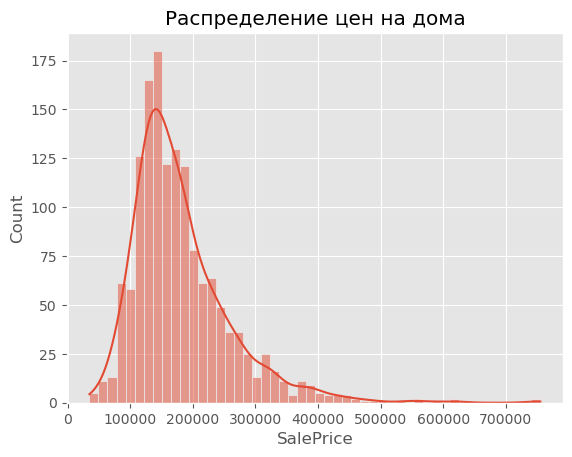

In [14]:
sns.histplot(train_df['SalePrice'], bins=50, kde=True)
plt.title("Распределение цен на дома")

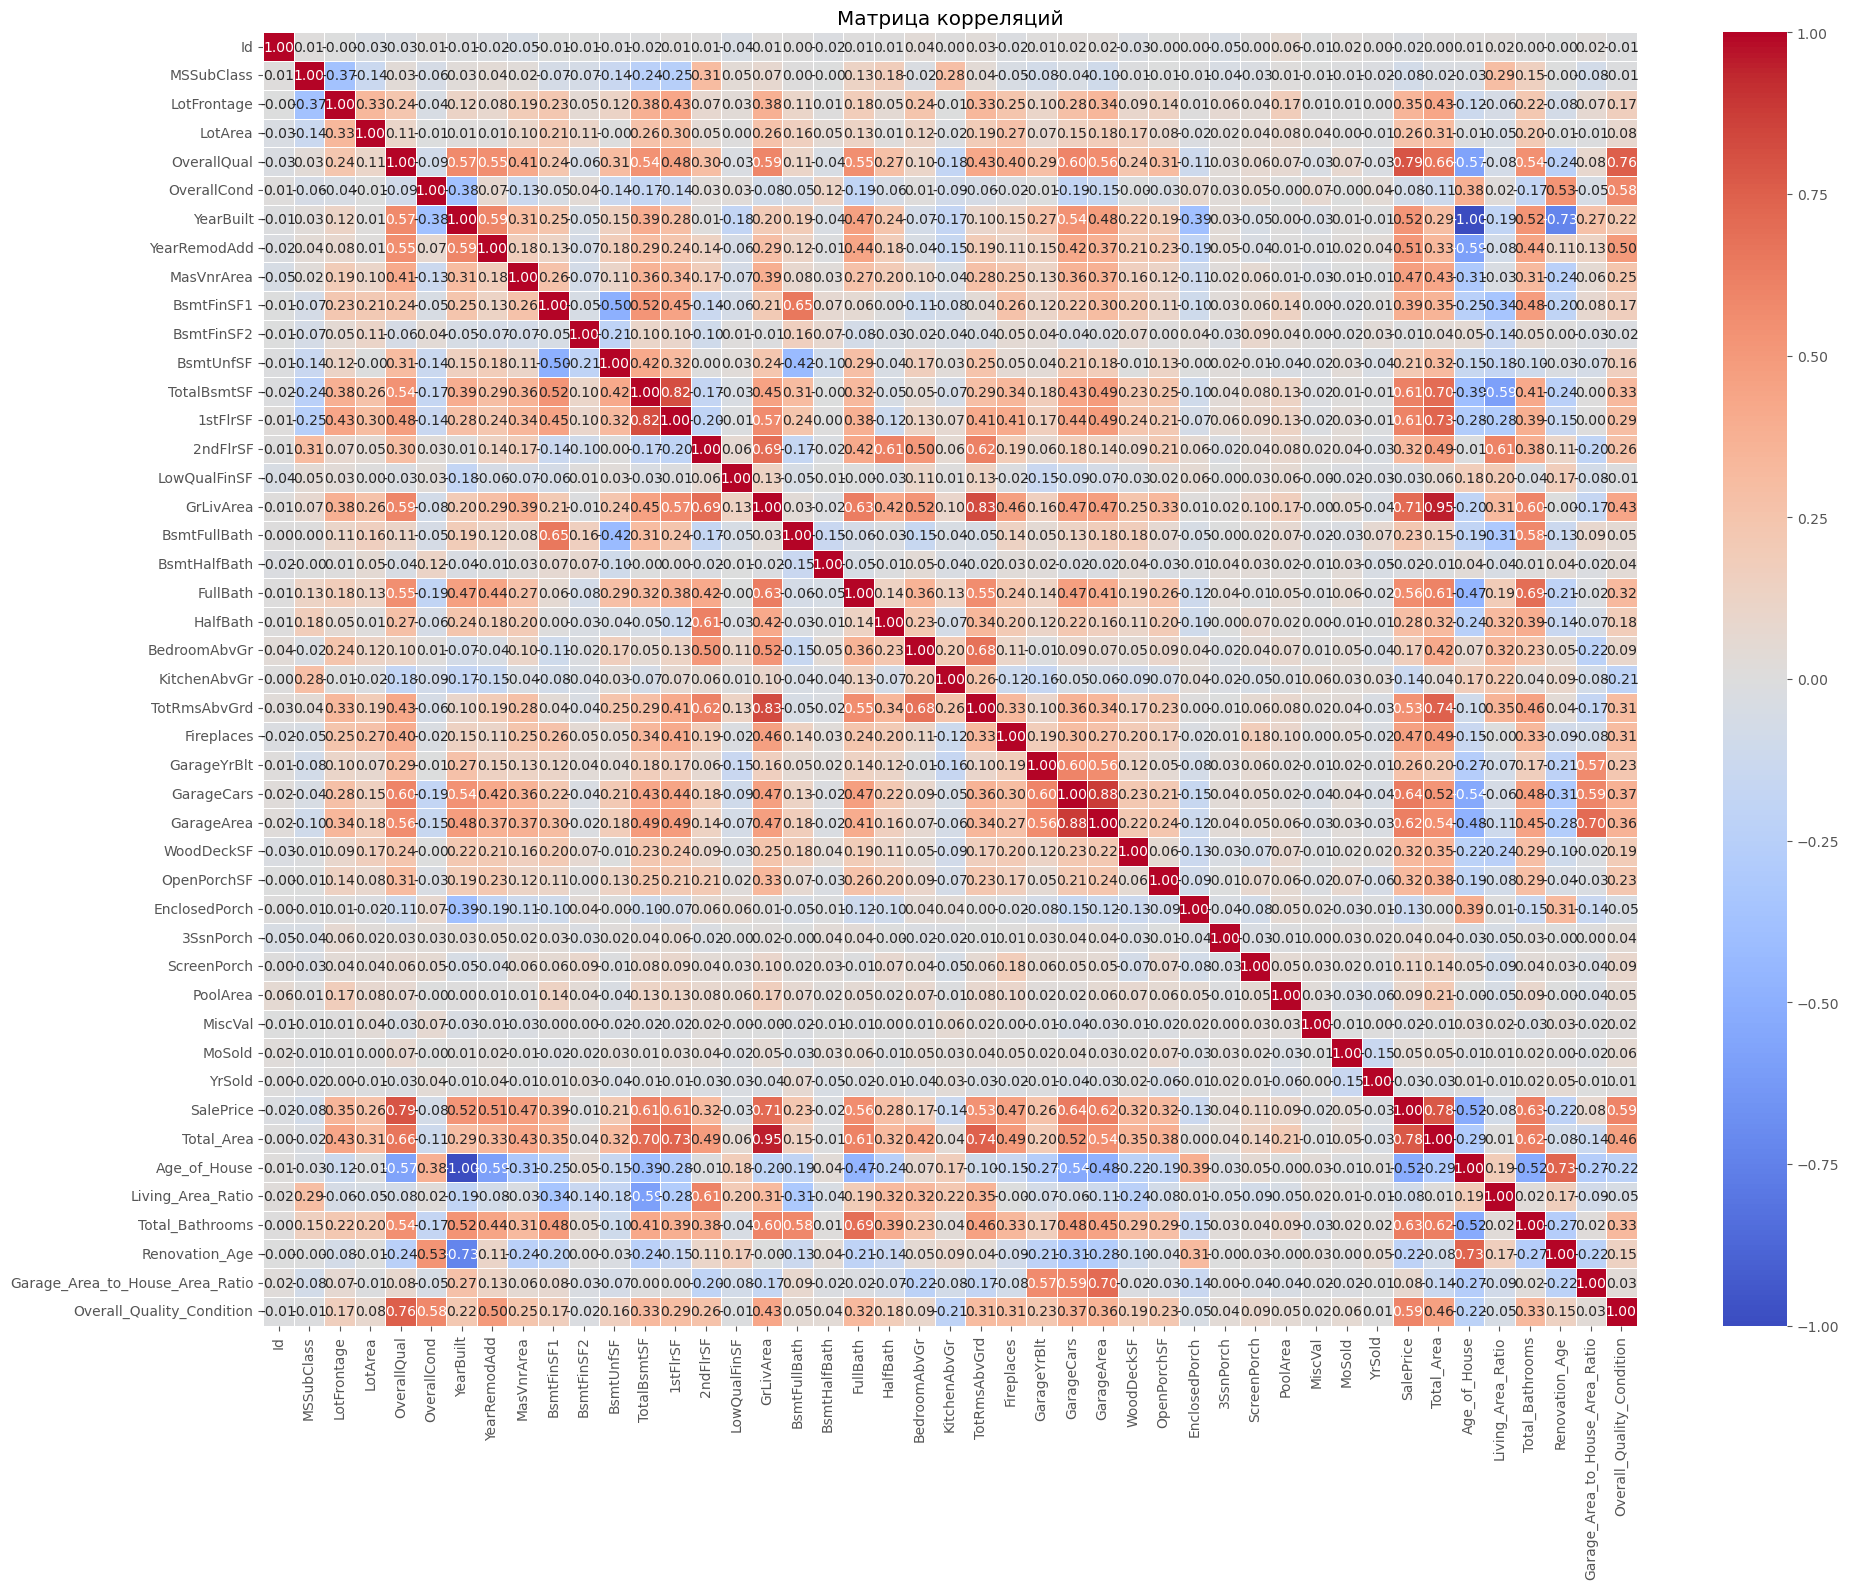

In [15]:
# Вычисление корреляций для числовых признаков
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
corr = train_data[numeric_features].corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляций")
plt.tight_layout()
plt.show()

In [16]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows', None)

In [17]:
categorical_features = list(X.select_dtypes(include=['object']).columns)
y_train_log = np.log1p(y)

In [18]:
train_pool = Pool(data=X, label=y_train_log, cat_features=categorical_features)
model = CatBoostRegressor(iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='RMSE',
    eval_metric='R2',
    random_seed=42,
    verbose=100)
model.fit(train_pool)


0:	learn: 0.0397607	total: 63.5ms	remaining: 1m 3s
100:	learn: 0.8916116	total: 629ms	remaining: 5.6s
200:	learn: 0.9309826	total: 1.19s	remaining: 4.72s
300:	learn: 0.9431062	total: 1.73s	remaining: 4.03s
400:	learn: 0.9488320	total: 2.28s	remaining: 3.4s
500:	learn: 0.9531252	total: 2.84s	remaining: 2.83s
600:	learn: 0.9573392	total: 3.42s	remaining: 2.27s
700:	learn: 0.9605679	total: 4s	remaining: 1.71s
800:	learn: 0.9641128	total: 4.6s	remaining: 1.14s
900:	learn: 0.9677654	total: 5.16s	remaining: 567ms
999:	learn: 0.9712566	total: 5.72s	remaining: 0us


In [67]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

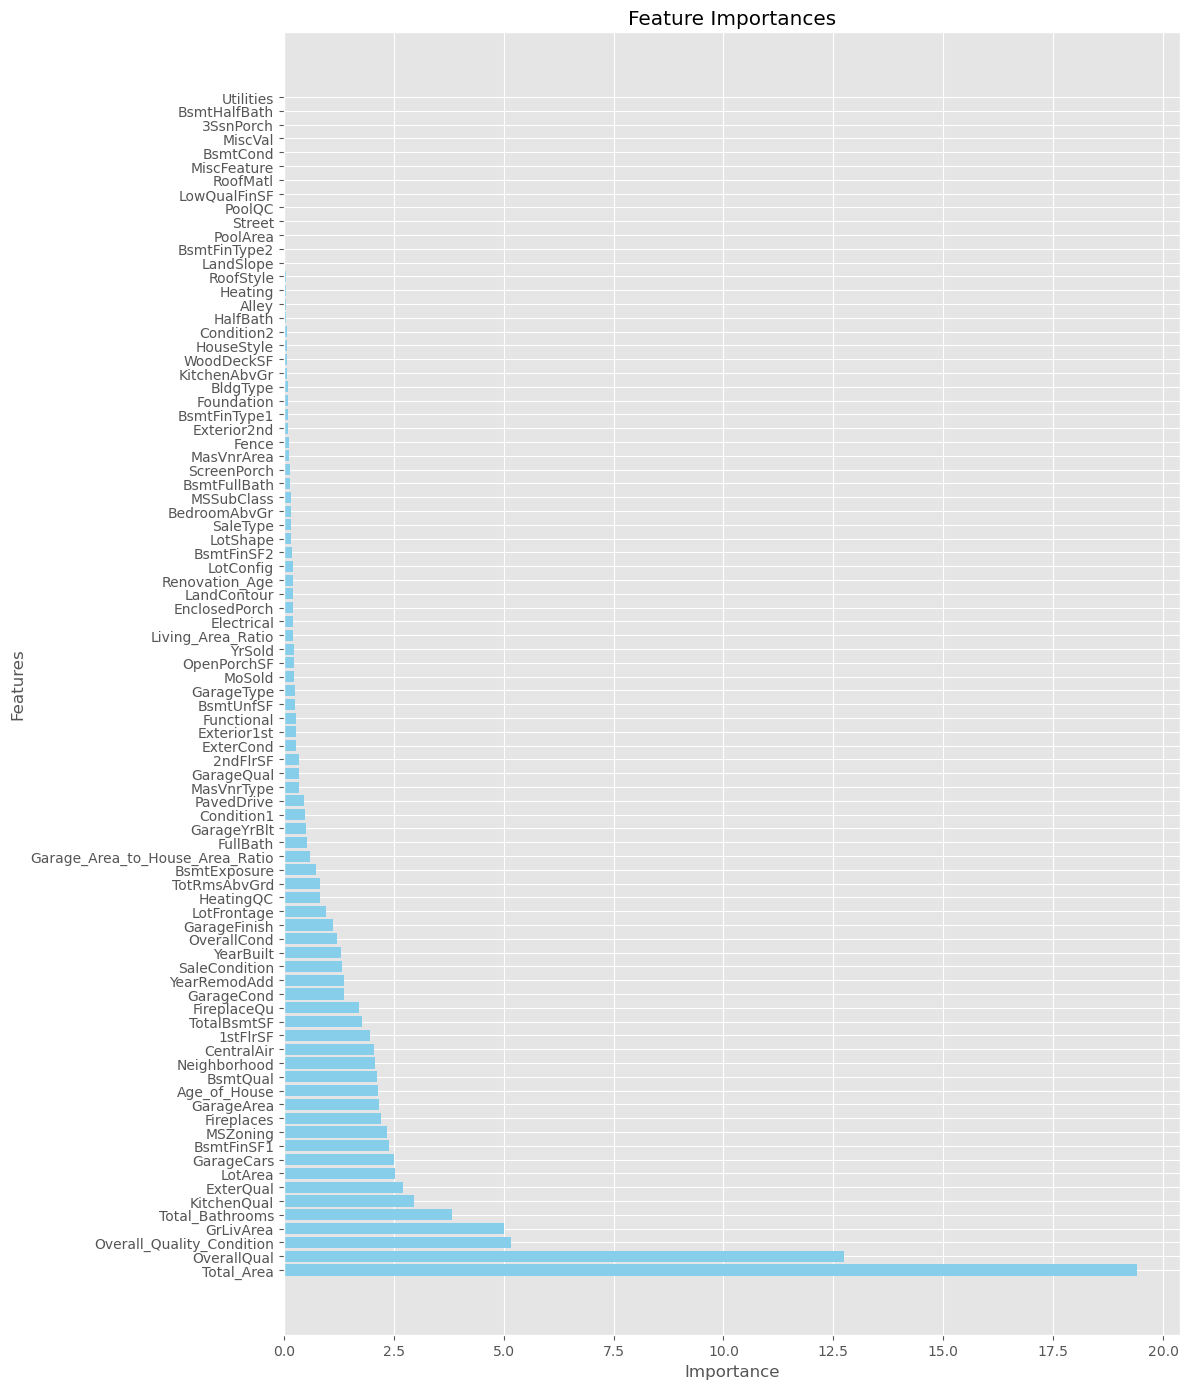

In [69]:
plt.figure(figsize=(12, 14))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()

In [70]:
test_ids = test_data['Id']
X_test = test_data.drop('Id', axis=1)

In [71]:
# Убедимся, что все нужные столбцы на месте
missing_cols = set(X.columns) - set(X_test.columns)
if missing_cols:
    print("Недостающие колонки в тесте:", missing_cols)

In [72]:
test_pool = Pool(X_test, cat_features=categorical_features)

In [73]:
preds = np.expm1(model.predict(test_pool))
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': preds
})

In [74]:
submission

,Id,SalePrice
0,1461,117739.065029
1,1462,158127.684373
2,1463,182137.423096
3,1464,195079.626918
4,1465,182589.088555
...,...,...
1454,2915,83333.721062
1455,2916,81242.139391
1456,2917,161004.605047
1457,2918,117506.007430


In [75]:
submission.to_csv('submission 9.csv', index=False)

In [ ]:
# encoder = LabelEncoder()

# df['ExterQual_encoded'] = encoder.fit_transform(df['ExterQual'])

In [ ]:
# df = pd.get_dummies(df, columns=['MSSubClass', 'RoofStyle', 'GarageType'], drop_first=True) one-hot

In [ ]:
# ordinal_encoder = OrdinalEncoder(categories=[['Very Poor', 'Poor', 'Fair', 'Average', 'Good', 'Very Good', 'Excellent']])
# df['OverallQual_encoded'] = ordinal_encoder.fit_transform(df[['OverallQual']])

In [ ]:
# df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')  поменять nan на No .... 